<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

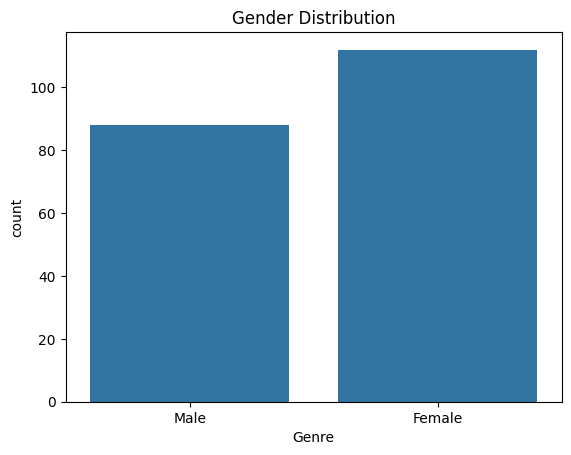

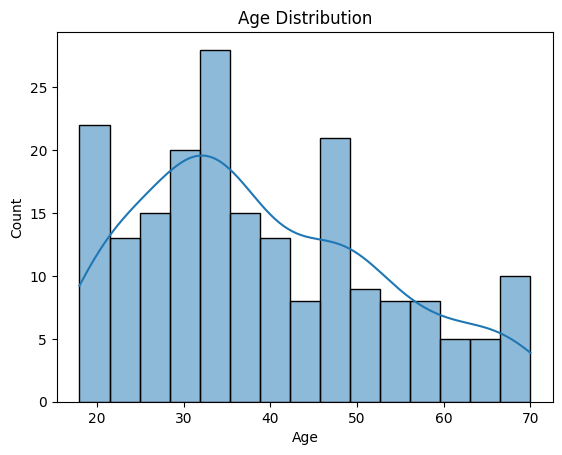

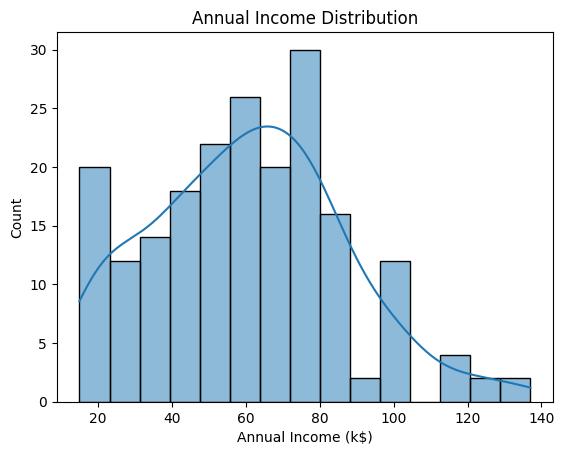

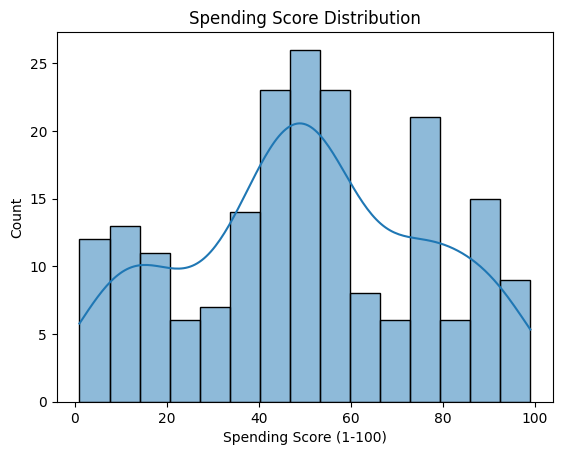

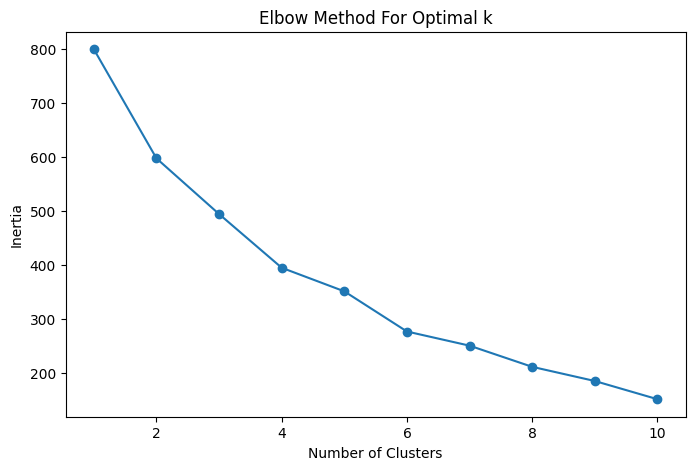

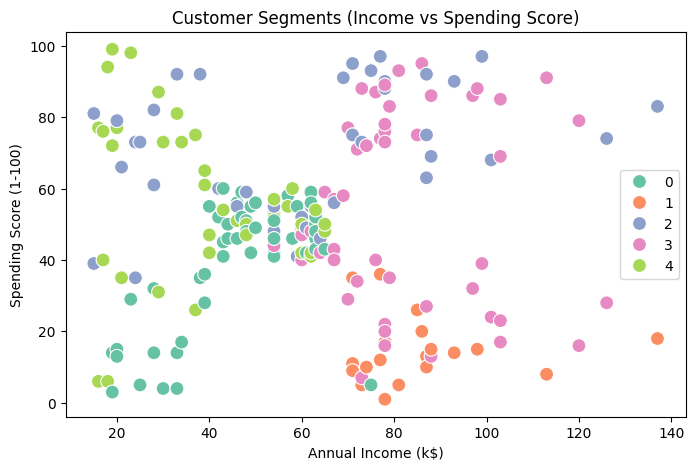

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
#  Customer Segmentation using K-Means Clustering

# --------------------------------------------------
# 1. Load Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

# --------------------------------------------------
# 2. Load the Dataset
df = pd.read_csv('/content/Mall_Customers.csv')  # adjust path if needed
df.head()

# --------------------------------------------------
# 3. Basic Info
print(df.info())
print(df.describe())

# --------------------------------------------------
# 4. EDA: Visualize Distributions
sns.countplot(x='Genre', data=df)
plt.title("Gender Distribution")
plt.show()

sns.histplot(df['Age'], bins=15, kde=True)
plt.title("Age Distribution")
plt.show()

sns.histplot(df['Annual Income (k$)'], bins=15, kde=True)
plt.title("Annual Income Distribution")
plt.show()

sns.histplot(df['Spending Score (1-100)'], bins=15, kde=True)
plt.title("Spending Score Distribution")
plt.show()

# --------------------------------------------------
# 5. Preprocessing
df_clustering = df.drop("CustomerID", axis=1)

le = LabelEncoder()
df_clustering['Genre'] = le.fit_transform(df_clustering['Genre'])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clustering)

# --------------------------------------------------
# 6. Elbow Method to Choose k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# --------------------------------------------------
# 7. Apply KMeans with k=5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(scaled_features)

df['Cluster'] = kmeans.labels_

# --------------------------------------------------
# 8. Visualize Clusters: Income vs Spending
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set2',
    s=100
)
plt.title('Customer Segments (Income vs Spending Score)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# --------------------------------------------------
# 9.  Save Final Data
df.to_csv('Customer_Segments.csv', index=False)


from google.colab import files
files.download('Customer_Segments.csv')


#  Conclusion: Cluster Insights

**Cluster 0 (Blue):** Low income, high spending – impulsive or younger customers.  
**Cluster 1 (Orange):** High income, low spending – cautious or selective spenders.  
**Cluster 2 (Green):** Average income, average spending – general customers.  
**Cluster 3 (Purple):** Low income, low spending – least engaged.  
**Cluster 4 (Pink):** High income, high spending – premium/VIP customers.

Businesses can use this segmentation to tailor marketing, offers, and services for different customer types.
